In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# exploring the data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
39504,41:58.0,11.3,2011-12-14 17:41:58 UTC,-73.978500,40.724600,-73.959700,40.718000,0
17650,22:10.0,5.3,2010-09-25 09:22:10 UTC,-73.979656,40.771152,-73.968745,40.764538,1
9349,52:04.0,11.5,2013-06-18 18:52:04 UTC,-74.004359,40.740731,-73.982998,40.727019,1
18511,39:00.0,5.5,2013-11-16 21:39:00 UTC,0.000000,0.000000,0.000000,0.000000,2
3150,14:13.0,9.0,2015-06-08 04:14:13 UTC,-73.996964,40.725010,-73.994743,40.750446,1
46931,40:00.0,8.0,2014-01-10 22:40:00 UTC,-74.003215,40.732912,-73.983112,40.726732,1
16733,13:49.0,9.0,2014-04-06 14:13:49 UTC,-73.991507,40.735133,-73.980127,40.751723,1
35581,20:01.0,55.5,2012-11-09 21:20:01 UTC,-74.008232,40.712096,-73.765452,40.661903,1
22113,23:24.0,12.0,2012-12-28 08:23:24 UTC,-73.953265,40.779392,-73.975769,40.751003,2
14267,38:33.0,11.0,2014-02-23 17:38:33 UTC,-74.002820,40.733770,-74.002510,40.760734,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
# we can drop unique id because it is not necessary and also if we remove it will not effect the final output
df.drop("unique_id",axis=1,inplace=True)

In [8]:
# we have to check target variable
df["amount"].describe() 

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [9]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
# we have to check the amount which is in negative 
from collections import Counter
Counter(df['amount'] < 0)

Counter({False: 49994, True: 6})

In [11]:
# we should drop those amount which is less than zero
df=df.drop(df[df['amount'] < 0].index, axis=0)
df.shape

(49994, 7)

In [12]:
df["amount"].describe() 

count    49994.000000
mean        11.365903
std          9.684843
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

## we have to check longitude and latitude ranges

In [13]:
df[df['longitude_of_pickup'] < -90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [14]:
df[df['longitude_of_dropoff'] > 90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [15]:
df[df['latitude_of_dropoff'] > 90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [16]:
df[df['latitude_of_pickup'] < -90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


## from the above we can conclude that the longitude and latitude is b/w -90 to +90

In [17]:
# checking null values
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [18]:
df["longitude_diff"]=df["longitude_of_dropoff"] - df["longitude_of_pickup"]
df["latitude_diff"]=df["latitude_of_dropoff"] - df["latitude_of_pickup"]

In [19]:
# we have to divide date_time_of_pickup
df["time"] = pd.to_datetime(df["date_time_of_pickup"])

df["Year"] = df["time"].dt.year

df["Month"] = df["time"].dt.month

df["Weekday"] = df["time"].dt.weekday

df["hour"] = df["time"].dt.hour

df = df.drop(columns = ["date_time_of_pickup", "time"])

In [20]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,longitude_diff,latitude_diff,Year,Month,Weekday,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,-0.009041,2009,6,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,2010,1,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,-0.008504,-0.010708,2011,8,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,-0.004437,0.024949,2012,4,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2010,3,1,7


## Visualization

<AxesSubplot:xlabel='Month', ylabel='count'>

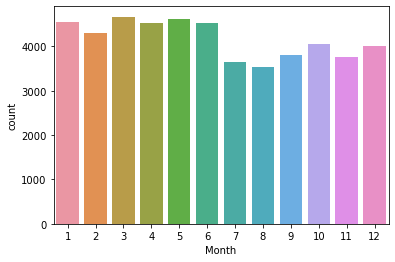

In [21]:
sns.countplot(x = df["Month"])

Text(0, 0.5, 'cost')

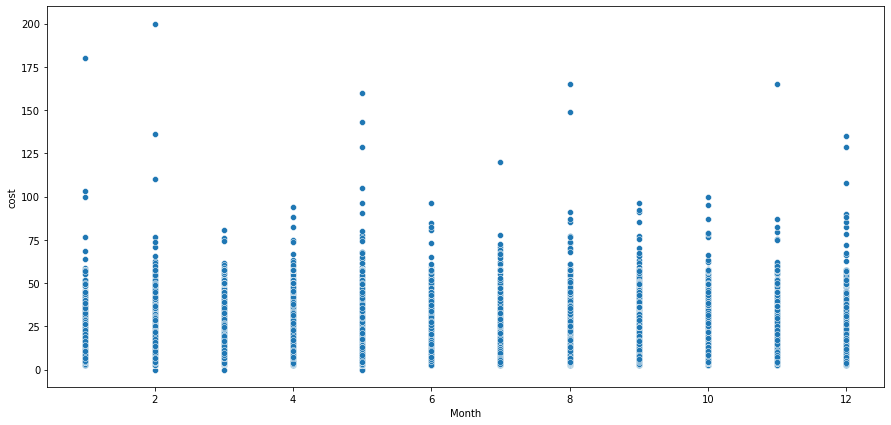

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["Month"], y = df["amount"])
plt.xlabel('Month')
plt.ylabel('cost')

<AxesSubplot:xlabel='Year', ylabel='count'>

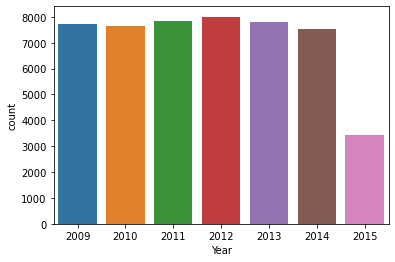

In [23]:
# cost may change with year
sns.countplot(x = df["Year"])
              

Text(0, 0.5, 'cost')

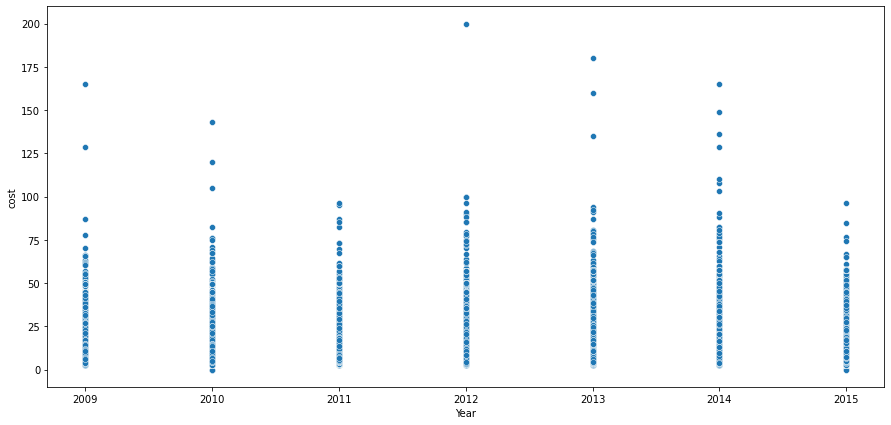

In [24]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["Year"], y = df["amount"])
plt.xlabel('Year')
plt.ylabel('cost')

<AxesSubplot:xlabel='Weekday', ylabel='count'>

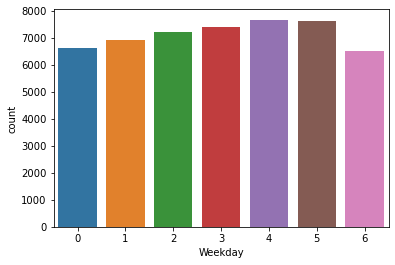

In [25]:
# does weeekdays effects cost
sns.countplot(x = df["Weekday"])

Text(0, 0.5, 'Fare')

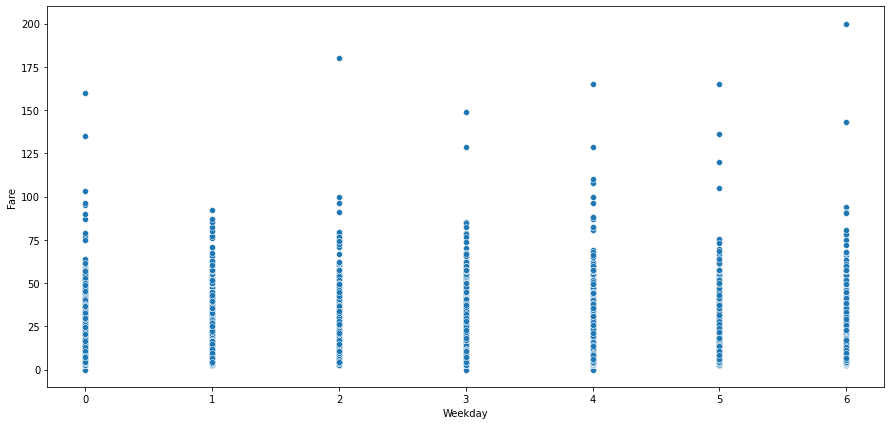

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["Weekday"], y = df["amount"])
plt.xlabel('Weekday')
plt.ylabel('Fare')

## from the above we can say that amount will not get that affect in weekdays

<AxesSubplot:xlabel='hour', ylabel='count'>

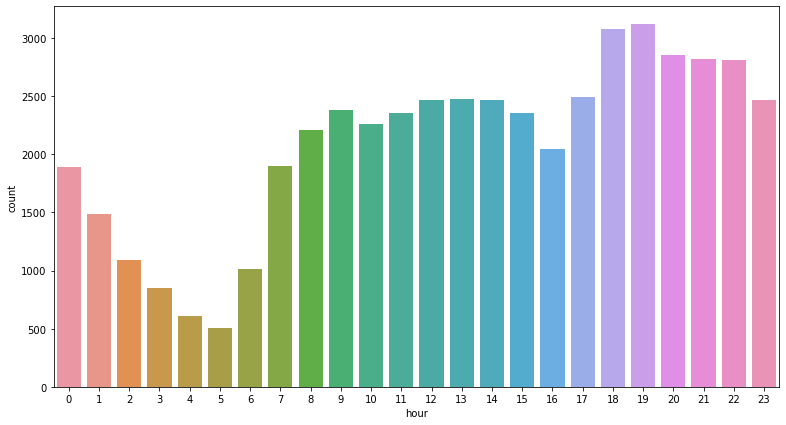

In [27]:
plt.figure(figsize=(13, 7))
sns.countplot(x = df["hour"])

## from the above plot the frequency of cabs is lower at 5am and higher at 7pm

Text(0, 0.5, 'cost')

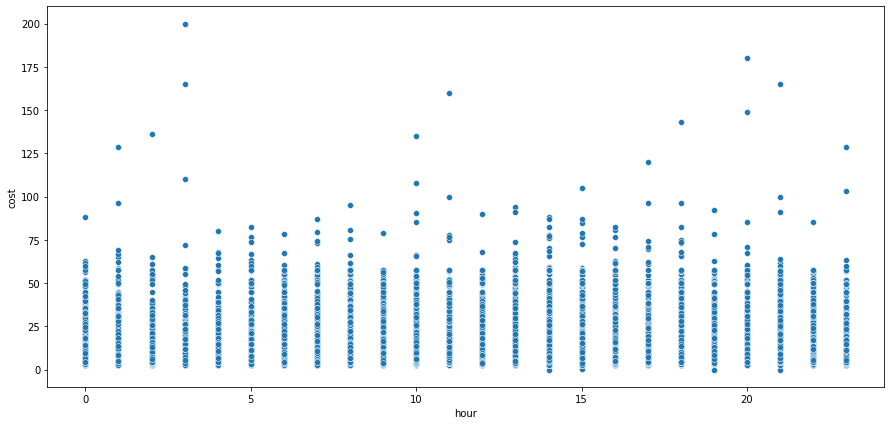

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["hour"], y = df["amount"])
plt.xlabel('hour')
plt.ylabel('cost')

## does number of passengers affects the amount?

<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

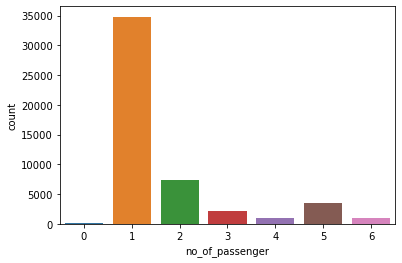

In [29]:
sns.countplot(x = df["no_of_passenger"])

Text(0, 0.5, 'cost')

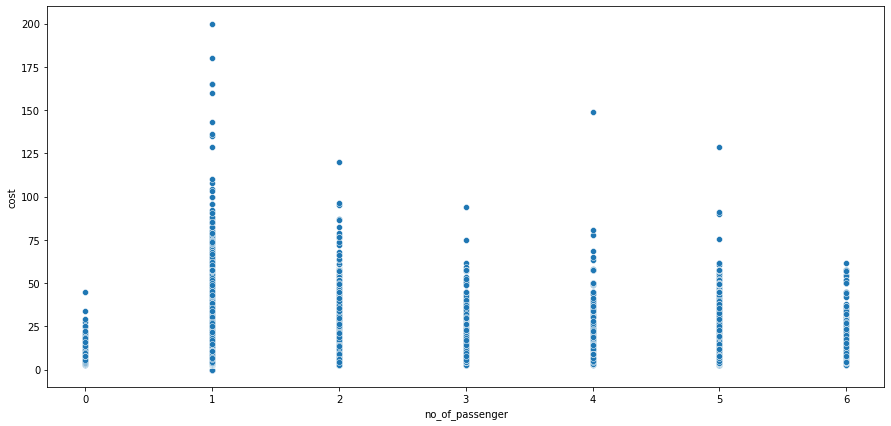

In [30]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["no_of_passenger"], y = df["amount"])
plt.xlabel('no_of_passenger')
plt.ylabel('cost')

## From the above two graphs, single passenger is most frequent and highest amount also comes from the cab that carry exactly single passenger

### We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [31]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [32]:
haversine_distance("longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff")

0           0.410442
1           4.628504
2           1.001022
3           0.910440
4           1.361021
5           3.226363
6           0.799329
7           4.371676
8           1.495838
9           1.420632
10          1.739672
11          0.000000
12          0.947381
13          0.677372
14          0.616053
15          0.000000
16          0.771837
17          1.486047
18          1.198772
19          0.117244
20          0.892678
21          0.727798
22          0.725676
23          1.566615
24          1.284831
25          1.738974
26          0.000000
27          0.281221
28          1.969135
29          0.226278
30          0.595261
31          3.261210
32         12.400955
33          1.552464
34          2.061834
35          6.495473
36          0.542977
37          1.141591
38          2.201037
39          1.035149
40          0.535620
41          3.286236
42          3.630052
43          3.580343
44          1.214656
45          1.021921
46          1.149948
47          0

In [33]:
df['H_Distance'].head(10)

0    0.410442
1    4.628504
2    1.001022
3    0.910440
4    1.361021
5    3.226363
6    0.799329
7    4.371676
8    1.495838
9    1.420632
Name: H_Distance, dtype: float64

In [34]:
df.head(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,longitude_diff,latitude_diff,Year,Month,Weekday,hour,H_Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,-0.009041,2009,6,0,17,0.410442
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,2010,1,1,16,4.628504
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,-0.008504,-0.010708,2011,8,3,0,1.001022
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,-0.004437,0.024949,2012,4,5,4,0.910440
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2010,3,1,7,1.361021
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603,2011,1,3,9,3.226363
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,0.006200,0.013180,2012,11,1,20,0.799329
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,-0.038795,-0.023090,2012,1,2,17,4.371676
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,0.013384,0.004915,2012,12,0,13,1.495838
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,-0.010882,0.024265,2009,9,2,1,1.420632


## distance b/w pick up and dropp off will affect the amount

### Firstly check the frequency of the distnaces that we calculated using Harevrsine Formula. I will do so by creating bins (0-10 Kms, 10-20 Kms, and so on.) binning means The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets Equal Frequency Binning : bins have equal frequency

In [35]:
bins_0 = df.loc[(df['H_Distance'] == 0), ['H_Distance']]
bins_1 = df.loc[(df['H_Distance'] > 0) & (df['H_Distance'] <= 10),['H_Distance']]
bins_2 = df.loc[(df['H_Distance'] > 10) & (df['H_Distance'] <= 50),['H_Distance']]
bins_3 = df.loc[(df['H_Distance'] > 50) & (df['H_Distance'] <= 100),['H_Distance']]
bins_4 = df.loc[(df['H_Distance'] > 100) & (df['H_Distance'] <= 200),['H_Distance']]
bins_5 = df.loc[(df['H_Distance'] > 300),['H_Distance']]
bins_6 = df.loc[(df['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins = pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

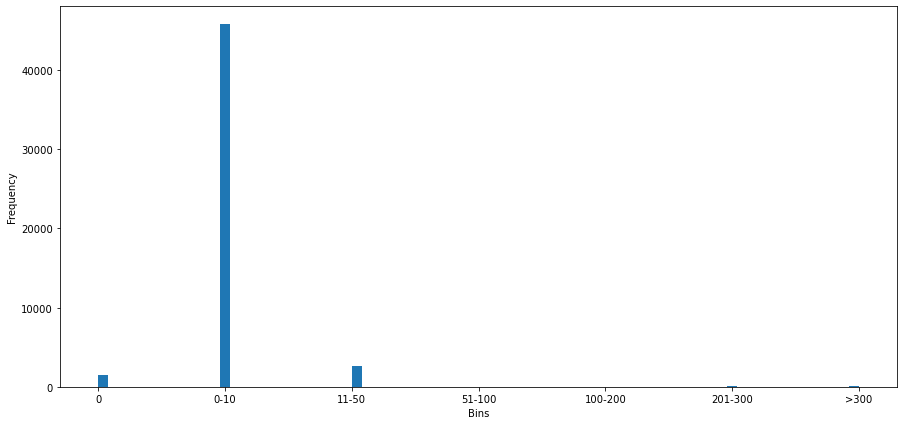

In [36]:
plt.figure(figsize = (15, 7))
plt.hist(dist_bins['bins'], bins = 75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [37]:
Counter(dist_bins['bins'])

Counter({'0': 1449,
         '0-10': 45775,
         '11-50': 2660,
         '51-100': 14,
         '100-200': 3,
         '201-300': 93,
         '>300': 93})

### how many H_distance are zero?

In [38]:
df[(df['H_Distance'] == 0)]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,longitude_diff,latitude_diff,Year,Month,Weekday,hour,H_Distance
11,5.50,0.000000,0.000000,0.000000,0.000000,3,0.0,0.0,2012,12,0,11,0.0
15,5.00,0.000000,0.000000,0.000000,0.000000,1,0.0,0.0,2013,11,5,12,0.0
26,6.50,0.000000,0.000000,0.000000,0.000000,1,0.0,0.0,2011,2,0,20,0.0
105,52.00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,0.0,2009,3,2,0,0.0
124,8.00,0.000000,0.000000,0.000000,0.000000,2,0.0,0.0,2013,1,3,17,0.0
191,6.50,-73.998488,40.726303,-73.998488,40.726303,1,0.0,0.0,2014,1,2,21,0.0
192,3.70,0.000000,0.000000,0.000000,0.000000,5,0.0,0.0,2010,9,6,17,0.0
233,8.50,0.000000,0.000000,0.000000,0.000000,2,0.0,0.0,2011,7,6,1,0.0
270,7.50,-73.995892,40.746454,-73.995892,40.746454,1,0.0,0.0,2012,8,5,1,0.0
273,8.10,0.000000,0.000000,0.000000,0.000000,4,0.0,0.0,2009,10,4,18,0.0


In [39]:
len(df[df['H_Distance'] == 0])

1449

### is there any H_distance and amount are zero?

In [40]:
df[(df['H_Distance'] == 0) & (df['amount'] == 0)]


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,longitude_diff,latitude_diff,Year,Month,Weekday,hour,H_Distance


In [41]:
df[(df['H_Distance'] == 0)].shape


(1449, 13)

In [42]:
high_distance = df.loc[(df['H_Distance'] > 200) & (df['amount'] != 0)]

In [43]:
high_distance.shape

(93, 13)

In [44]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['amount'] - 2.50) / 1.56,
    axis = 1
)

C:\Users\preetham\AppData\Local\Temp/ipykernel_16640/1400222728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_distance['H_Distance'] = high_distance.apply(


# modeling

In [45]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'longitude_diff', 'latitude_diff', 'Year', 'Month', 'Weekday', 'hour',
       'H_Distance'],
      dtype='object')

In [46]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [47]:

x= df.iloc[:, df.columns != 'amount']
y = df['amount'].values

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6,random_state=1)


In [49]:
reg=LinearRegression()

In [50]:
reg.fit(x_train,y_train)

LinearRegression()

In [51]:
reg.score(x_train,y_train)

0.018129862757468862

In [52]:
reg.score(x_test,y_test)

0.016498039985054613

In [53]:
xScaled =x.apply(zscore)
xScaled.describe()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,longitude_diff,latitude_diff,Year,Month,Weekday,hour,H_Distance
count,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04,4.999400e+04
mean,4.643621e-17,-3.807850e-16,-4.611143e-17,-9.615208e-16,-6.455811e-16,-1.424457e-17,3.183126e-17,-3.319289e-14,1.251727e-16,9.199191e-16,2.000196e-17,1.090682e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.803693e-01,-1.830323e+01,-1.167768e+00,-1.894979e+01,-1.293717e+00,-2.416227e+01,-1.552059e+02,-1.470608e+00,-1.523595e+00,-1.548362e+00,-2.073050e+00,-4.979922e-02
25%,-1.426230e-01,1.287063e-01,-1.427690e-01,1.342905e-01,-5.180424e-01,-4.859846e-03,-2.996439e-03,-9.337036e-01,-9.457611e-01,-1.037342e+00,-6.899122e-01,-4.751250e-02
50%,-1.416395e-01,1.315652e-01,-1.417049e-01,1.374503e-01,-5.180424e-01,-9.979946e-04,2.884234e-03,1.401060e-01,-7.901087e-02,-1.530177e-02,7.849790e-02,-4.552192e-02
75%,-1.402265e-01,1.339236e-01,-1.401191e-01,1.399109e-01,2.576326e-01,3.297675e-03,9.001615e-03,6.770108e-01,7.877393e-01,1.006738e+00,8.469080e-01,-4.189499e-02
max,1.089947e+01,5.801450e+01,1.089653e+01,5.801729e-01,3.360333e+00,2.416141e+01,1.757686e+01,1.750820e+00,1.654490e+00,1.517758e+00,1.461636e+00,2.412233e+01


In [54]:
knn=KNeighborsRegressor(n_neighbors=30)

In [55]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [56]:
predicted_labels=knn.predict(x_test)
knn.score(x_test, y_test)

0.6641782130652327

In [57]:
knn.score(x_train,y_train)

0.669130708463497

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model=DecisionTreeRegressor()

In [60]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
model.score(x_train,y_train)

0.9999599934744332

In [62]:
model.score(x_test,y_test)

0.5417149242092345

In [63]:
model1=DecisionTreeRegressor(max_depth=3)

In [64]:
model1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [65]:
model1.score(x_train,y_train)

0.6480210242355011

In [66]:
model1.score(x_test,y_test)

0.6454463277389071

In [67]:
from sklearn.ensemble import BaggingRegressor

In [68]:
bag=BaggingRegressor(n_estimators=100,base_estimator=model1)

In [69]:
bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=100)

In [70]:
bag.score(x_train,y_train)

0.6689436792215451

In [71]:
bag.score(x_test,y_test)

0.6657811328108635

In [72]:
from sklearn.ensemble import AdaBoostRegressor

In [73]:
ABR=AdaBoostRegressor(n_estimators=2,base_estimator=model1,learning_rate=0.5)

In [74]:
ABR.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.5, n_estimators=2)

In [75]:
ABR.score(x_train,y_train)

0.6481500322722527

In [76]:
ABR.score(x_test,y_test)

0.6476495332060562

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
GBR=GradientBoostingRegressor()

In [79]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [80]:
GBR.score(x_train,y_train)

0.8277723888918707

In [81]:
GBR.score(x_test,y_test)

0.7745526551981022

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
RFR=RandomForestRegressor(n_estimators=73,max_depth=3,max_features=5)

In [84]:
RFR.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, max_features=5, n_estimators=73)

In [85]:
RFR.score(x_train,y_train)

0.6458338235669551

In [86]:
RFR.score(x_test,y_test)

0.649134931003214

In [90]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [91]:
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
print("Ridge model:",(ridge.coef_))


Ridge model: [ 2.16442409e-02  4.02614320e-03 -2.69588304e-03  2.49959317e-02
  1.37829234e-01 -2.43401238e-02  2.09697885e-02  6.53694895e-01
  1.17131583e-01  2.76046419e-03 -3.78454780e-02  3.91978057e-04]


In [92]:
lasso=Lasso(alpha=0.1) # here alpha is the penalty
lasso.fit(x_train,y_train)
print("Lasso model:",(lasso.coef_))

Lasso model: [ 1.79072058e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.78186858e-02 -3.56375604e-02  1.03394867e-02  6.22899168e-01
  1.06974167e-01  0.00000000e+00 -3.53808820e-02  4.19102683e-04]
